# **Deep Learning Lab (20-01-2025)**

#### Name: T. Vineeth Kumar
#### ID: 22WU0104118
#### Class: AI and ML-B (LEOPARDS)

# Experiment -1 Perceptron implementation to a dataset for Binary classification

### Dataset Description

The **Wine Dataset** is a classic dataset in machine learning and statistics, available in the `sklearn` library. It contains **13 continuous features** representing the chemical properties of wine samples. The samples are classified into **3 distinct classes** [Class-0, Class-1, Class-2], corresponding to different wine cultivars.

In this notebook, we simplify the problem into a **binary classification task**:
- **Class 0** (one type of wine) vs. **Not-Class 0** (other types of wine).

For visualization purposes, we use only the first two features:
1. **Alcohol**: Alcohol content in the wine.
2. **Malic Acid**: Malic acid concentration in the wine.

The dataset is split into training and testing sets, with features standardized for optimal performance.

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.

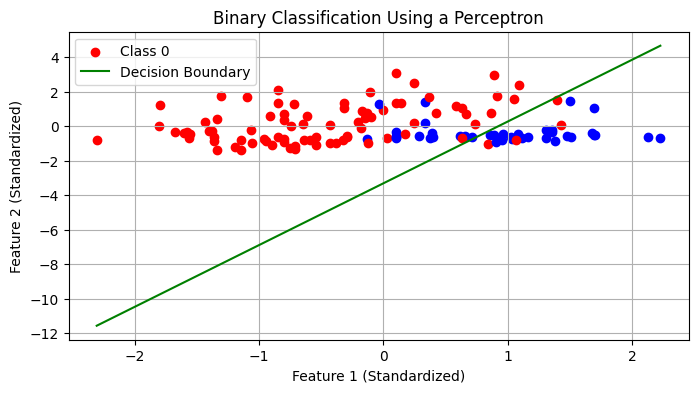

Testing the Perceptron on the test set:
Input: [0.80742634 0.63488443], Prediction: 0, Actual: 1
Input: [1.48754664 1.49109325], Prediction: 1, Actual: 1
Input: [-0.03974104  0.3707349 ], Prediction: 0, Actual: 0
Input: [ 0.91481376 -0.8224923 ], Prediction: 1, Actual: 1
Input: [-0.7079294  -1.12307625], Prediction: 0, Actual: 0
Input: [ 1.59493405 -0.43993091], Prediction: 1, Actual: 1
Input: [-1.149411    0.93546838], Prediction: 0, Actual: 0
Input: [0.5210599  1.37268139], Prediction: 0, Actual: 0
Input: [-1.61475646 -0.95912137], Prediction: 0, Actual: 0
Input: [0.47333216 0.14301978], Prediction: 0, Actual: 0
Input: [ 0.64037925 -0.54012556], Prediction: 0, Actual: 1
Input: [0.64037925 0.65310164], Prediction: 0, Actual: 0
Input: [0.53299184 1.30892116], Prediction: 0, Actual: 1
Input: [-0.230652    0.93546838], Prediction: 0, Actual: 0
Input: [ 0.79549441 -0.54012556], Prediction: 1, Actual: 1
Input: [-0.52895038  0.02460792], Prediction: 0, Actual: 0
Input: [-1.85339516 -1.51474

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        self.weights = np.zeros(input_size + 1)  # Initialize weights and bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0  # Step function

    def predict(self, x):
        weighted_sum = np.dot(x, self.weights[1:]) + self.weights[0]
        return self.activation_function(weighted_sum)

    def fit(self, X, y):
        for epoch in range(self.epochs):
            for i in range(len(X)):
                x_i = np.insert(X[i], 0, 1)  # Add bias term to input
                y_pred = self.predict(X[i])
                error = y[i] - y_pred
                self.weights += self.learning_rate * error * x_i

# Load the Wine dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.head(10))

X = data.data
y = data.target

# Convert to a binary classification problem (e.g., Class 0 vs Not-Class 0)
y_binary = (y == 0).astype(int)

# Select two features for visualization (e.g., Alcohol and Malic Acid)
X = X[:, :2]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the perceptron
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=1000)
perceptron.fit(X_train, y_train)

# Visualize the decision boundary
plt.figure(figsize=(8, 4))

# Plot the training data
for i, x in enumerate(X_train):
    if y_train[i] == 1:
        plt.scatter(x[0], x[1], color='blue', label='Class 1' if i == 0 else "")
    else:
        plt.scatter(x[0], x[1], color='red', label='Class 0' if i == 0 else "")

# Plot decision boundary
x_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_values = -(perceptron.weights[1] * x_values + perceptron.weights[0]) / perceptron.weights[2]
plt.plot(x_values, y_values, color='green', label='Decision Boundary')

# Customize the plot
plt.title("Binary Classification Using a Perceptron")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.grid(True)
plt.show()

# Testing the Perceptron on the test set and displaying output as 0 or 1
print("Testing the Perceptron on the test set:")
correct = 0
for i, x in enumerate(X_test):
    prediction = perceptron.predict(x)  # Predict whether it belongs to Class 1 (1) or not (0)
    correct += (prediction == y_test[i])
    print(f"Input: {x}, Prediction: {prediction}, Actual: {y_test[i]}")

accuracy = correct / len(X_test)
print(f"Accuracy on test set: {accuracy:.2f}")

### Summary of Model Tuning
In the initial setup, the perceptron model was trained with a learning rate of 0.01 and 1000 epochs, achieving an accuracy of 0.85 on the test set.
However, when the learning rate was reduced to 0.001 and the number of epochs was changed to 1500, the accuracy decreased to 0.81.

 This indicates that reducing the learning rate and increasing the number of epochs led to a slight performance drop. The model may have been slower to converge, and the chosen learning rate may not have been optimal for the dataset, affecting its generalization performance on the test set.

# Experiment -2 SingleLayerPerceptron [AND & OR Gates]

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
class SingleLayerPerceptron:
    def __init__(self, input_size, output_size, learning_rate=0.01, epochs=1000):
        self.weights = np.zeros((output_size, input_size + 1))  # Initialize weights for each perceptron
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0  # Step function

    def predict(self, x):
        weighted_sum = np.dot(self.weights, np.insert(x, 0, 1))  # Add bias term
        return np.array([self.activation_function(s) for s in weighted_sum])

    def fit(self, X, y):
        for epoch in range(self.epochs):
            for i in range(len(X)):
                x_i = np.insert(X[i], 0, 1)  # Add bias term to input
                y_pred = self.predict(X[i])
                errors = y[i] - y_pred
                self.weights += self.learning_rate * errors[:, None] * x_i

In [7]:
# Define the dataset for AND Gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([[0], [0], [0], [1]])

# Train the Single-Layer Perceptron
slp_and = SingleLayerPerceptron(input_size=2, output_size=1, learning_rate=0.1, epochs=10)
slp_and.fit(X_and, y_and)

# Test the AND Gate
print("AND Gate Results:")
for x in X_and:
    print(f"Input: {x}, Output: {slp_and.predict(x)}")

AND Gate Results:
Input: [0 0], Output: [0]
Input: [0 1], Output: [0]
Input: [1 0], Output: [0]
Input: [1 1], Output: [1]


In [8]:
# Define the dataset for OR Gate
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([[0], [1], [1], [1]])

# Train the Single-Layer Perceptron
slp_or = SingleLayerPerceptron(input_size=2, output_size=1, learning_rate=0.1, epochs=10)
slp_or.fit(X_or, y_or)

# Test the OR Gate
print("\nOR Gate Results:")
for x in X_or:
    print(f"Input: {x}, Output: {slp_or.predict(x)}")


OR Gate Results:
Input: [0 0], Output: [0]
Input: [0 1], Output: [1]
Input: [1 0], Output: [1]
Input: [1 1], Output: [1]


# Experiment -3 Multi-Layer Perceptron for XOR Gate

Final weights from input to hidden layer:
[[4.59768352 6.44107541]
 [4.60129658 6.45560259]]

Final weights from hidden to output layer:
[[-10.28142379]
 [  9.59368371]]

Predicted output for XOR inputs:
[[0.01920427]
 [0.98342876]
 [0.98341295]
 [0.01716186]]


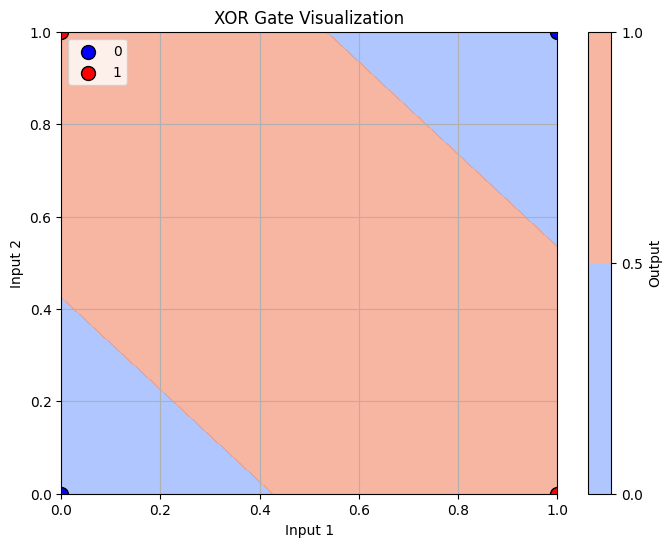

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class MLP:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.5):
        # Initialize parameters
        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.learning_rate = learning_rate

        # Initialize weights and biases
        np.random.seed(42)
        self.weights_input_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
        self.weights_hidden_output = np.random.uniform(size=(hidden_neurons, output_neurons))
        self.bias_hidden = np.random.uniform(size=(1, hidden_neurons))
        self.bias_output = np.random.uniform(size=(1, output_neurons))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, X, y, epochs=10000):
        for epoch in range(epochs):
            # Forward pass
            hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
            hidden_layer_output = self.sigmoid(hidden_layer_input)

            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
            predicted_output = self.sigmoid(output_layer_input)

            # Calculate error
            error = y - predicted_output

            # Backward pass
            d_predicted_output = error * self.sigmoid_derivative(predicted_output)

            error_hidden_layer = d_predicted_output.dot(self.weights_hidden_output.T)
            d_hidden_layer = error_hidden_layer * self.sigmoid_derivative(hidden_layer_output)

            # Update weights and biases
            self.weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * self.learning_rate
            self.weights_input_hidden += X.T.dot(d_hidden_layer) * self.learning_rate

            self.bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * self.learning_rate
            self.bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * self.learning_rate

    def predict(self, X):
        hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = self.sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        predicted_output = self.sigmoid(output_layer_input)

        return predicted_output

# XOR gate inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize and train the MLP
mlp = MLP(input_neurons=2, hidden_neurons=2, output_neurons=1, learning_rate=0.5)
mlp.train(X, y, epochs=10000)

# Testing the MLP
print("Final weights from input to hidden layer:")
print(mlp.weights_input_hidden)
print("\nFinal weights from hidden to output layer:")
print(mlp.weights_hidden_output)

print("\nPredicted output for XOR inputs:")
print(mlp.predict(X))

# Visualization of the XOR gate
def visualize_xor(mlp, X, y):
    x1 = np.linspace(0, 1, 100)
    x2 = np.linspace(0, 1, 100)
    x1_grid, x2_grid = np.meshgrid(x1, x2)
    grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]

    predictions = mlp.predict(grid_points).reshape(x1_grid.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(x1_grid, x2_grid, predictions, levels=[0, 0.5, 1], alpha=0.7, cmap="coolwarm")
    plt.colorbar(label="Output")

    for i, label in enumerate(y):
        if label == 0:
            plt.scatter(X[i, 0], X[i, 1], color="blue", edgecolor="k", label="0" if i == 0 else "", s=100)
        else:
            plt.scatter(X[i, 0], X[i, 1], color="red", edgecolor="k", label="1" if i == 1 else "", s=100)

    plt.title("XOR Gate Visualization")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

visualize_xor(mlp, X, y)


# Experiment-4 Activation Functions implementation and output comparison using set of inputs

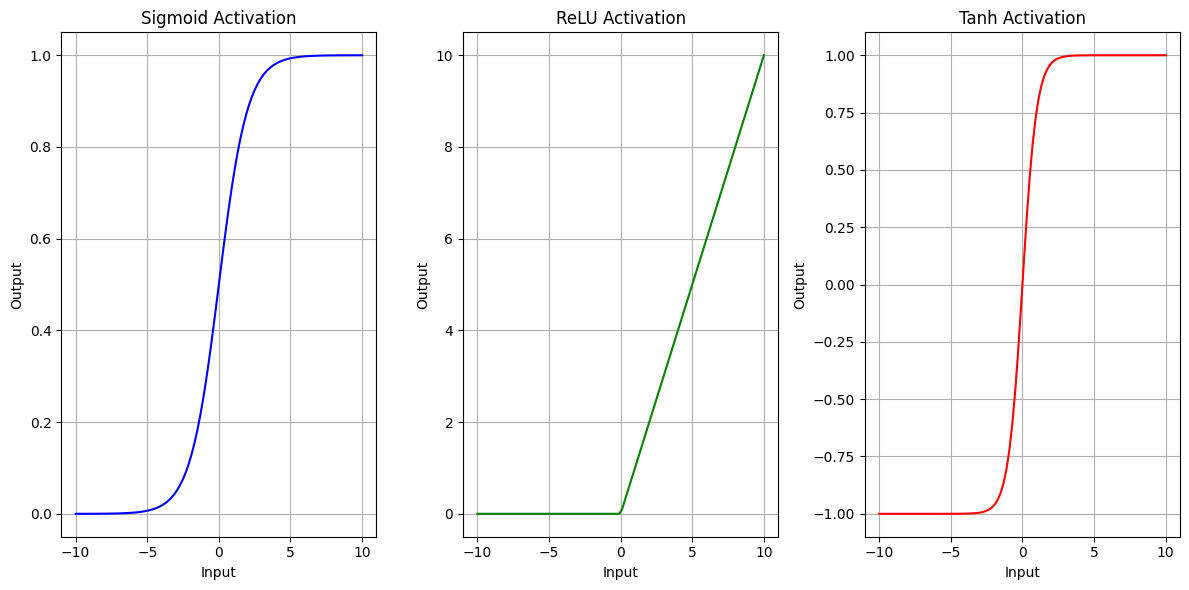

Input Dataset: [-2 -1  0  1  2]
Sigmoid Outputs: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
ReLU Outputs: [0 0 0 1 2]
Tanh Outputs: [-0.96402758 -0.76159416  0.          0.76159416  0.96402758]


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ActivationFunctions class
class ActivationFunctions:

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))


    def sigmoid_derivative(x):
        sigmoid_x = ActivationFunctions.sigmoid(x)
        return sigmoid_x * (1 - sigmoid_x)


    def relu(x):
        return np.maximum(0, x)


    def relu_derivative(x):
        return np.where(x > 0, 1, 0)


    def tanh(x):
        return np.tanh(x)


    def tanh_derivative(x):
        return 1 - np.tanh(x) ** 2

# Generate a dataset
x = np.linspace(-10, 10, 100)

# Apply activation functions
y_sigmoid = ActivationFunctions.sigmoid(x)
y_relu = ActivationFunctions.relu(x)
y_tanh = ActivationFunctions.tanh(x)

# Visualization of activation functions
plt.figure(figsize=(12, 6))

# Sigmoid
plt.subplot(1, 3, 1)
plt.plot(x, y_sigmoid, label="Sigmoid", color="blue")
plt.title("Sigmoid Activation")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

# ReLU
plt.subplot(1, 3, 2)
plt.plot(x, y_relu, label="ReLU", color="green")
plt.title("ReLU Activation")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

# Tanh
plt.subplot(1, 3, 3)
plt.plot(x, y_tanh, label="Tanh", color="red")
plt.title("Tanh Activation")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

plt.tight_layout()
plt.show()

# Comparing outputs on a dataset
dataset = np.array([-2, -1, 0, 1, 2])
print("Input Dataset:", dataset)
print("Sigmoid Outputs:", ActivationFunctions.sigmoid(dataset))
print("ReLU Outputs:", ActivationFunctions.relu(dataset))
print("Tanh Outputs:", ActivationFunctions.tanh(dataset))


### Activation Functions on Input Dataset

In this section, we evaluate three common activation functions: **Sigmoid**, **ReLU**, and **Tanh**, on a set of input values: `[-2, -1, 0, 1, 2]`. The activation functions are commonly used in neural networks to introduce non-linearity. Below are the results for each function:

1. **Sigmoid Function**:
   The Sigmoid function maps input values to a range between 0 and 1. It is commonly used in binary classification tasks.
   - Sigmoid Outputs: `[0.11920292, 0.26894142, 0.5, 0.73105858, 0.88079708]`

2. **ReLU (Rectified Linear Unit) Function**:
   ReLU outputs the input value if it is positive and zero if it is negative. It is widely used in hidden layers of deep neural networks due to its simplicity and efficiency.
   - ReLU Outputs: `[0, 0, 0, 1, 2]`

3. **Tanh Function**:
   The Tanh function maps input values to a range between -1 and 1. It is similar to the Sigmoid function but has a wider output range, making it useful in some contexts like recurrent neural networks.
   - Tanh Outputs: `[-0.96402758, -0.76159416, 0, 0.76159416, 0.96402758]`

These activation functions are essential for modeling complex relationships in neural networks by introducing non-linearity, allowing the model to learn from the data more effectively.


# Experiment  -5 Forward and Backpropagation

In [18]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=10000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights and biases
        np.random.seed(42)
        self.W1 = np.random.uniform(-1, 1, (input_size, hidden_size))  # Weights: input to hidden
        self.b1 = np.random.uniform(-1, 1, (1, hidden_size))          # Biases: hidden layer
        self.W2 = np.random.uniform(-1, 1, (hidden_size, output_size))  # Weights: hidden to output
        self.b2 = np.random.uniform(-1, 1, (1, output_size))          # Biases: output layer

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, X, y):
        for epoch in range(self.epochs):
            # Forward Propagation
            z1 = np.dot(X, self.W1) + self.b1
            a1 = self.sigmoid(z1)

            z2 = np.dot(a1, self.W2) + self.b2
            a2 = self.sigmoid(z2)

            # Compute error
            error = y - a2

            # Backpropagation
            d_a2 = error * self.sigmoid_derivative(a2)
            d_W2 = np.dot(a1.T, d_a2)
            d_b2 = np.sum(d_a2, axis=0, keepdims=True)

            d_a1 = np.dot(d_a2, self.W2.T) * self.sigmoid_derivative(a1)
            d_W1 = np.dot(X.T, d_a1)
            d_b1 = np.sum(d_a1, axis=0, keepdims=True)

            # Update weights and biases
            self.W2 += self.learning_rate * d_W2
            self.b2 += self.learning_rate * d_b2
            self.W1 += self.learning_rate * d_W1
            self.b1 += self.learning_rate * d_b1

    def predict(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = self.sigmoid(z1)

        z2 = np.dot(a1, self.W2) + self.b2
        a2 = self.sigmoid(z2)
        return np.round(a2)


# Define dataset (XOR problem)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])  # XOR truth table

# Initialize and train the neural network
nn = NeuralNetwork(input_size=2, hidden_size=3, output_size=1, learning_rate=0.1, epochs=10000)
nn.train(X, y)

# Test the trained network
print("Trained Outputs:")
print(nn.predict(X))
print("Expected Outputs:")
print(y)

Trained Outputs:
[[0.]
 [1.]
 [1.]
 [0.]]
Expected Outputs:
[[0]
 [1]
 [1]
 [0]]




### Neural Network for XOR Problem

In this section, we implement a basic neural network to solve the XOR problem using **forward propagation** and **backpropagation**. The XOR problem involves predicting the output for the XOR gate based on two binary inputs.

The network architecture consists of:
- **Input layer**: 2 neurons (representing the two inputs)
- **Hidden layer**: 3 neurons (with a sigmoid activation function)
- **Output layer**: 1 neuron (with a sigmoid activation function)

The neural network is trained using the following:
- **Learning rate**: 0.1
- **Epochs**: 10,000 (number of iterations for training)

#### Steps:
1. **Forward Propagation**: Calculates the outputs by passing inputs through the network layers.
2. **Backpropagation**: Adjusts the weights and biases based on the error in the output.
3. **Training**: The network learns the XOR pattern after several iterations.

#### Results:
After training, the network is able to correctly predict the XOR output for all possible input combinations.

- **Trained Outputs**:
  - `[[0.], [1.], [1.], [0.]]`
- **Expected Outputs**:
  - `[[0], [1], [1], [0]]`

The network successfully learns the XOR truth table!